In [1]:
import sys
sys.path.append("../planar")
import planar as planar
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

%pylab inline
figsize(10,6)
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


# Charlier polynomials and the planar GAF
To run an experiment, 
* we sample a realization of discrete white noise
* we compute its Charlier transform
* we find the zeros of the spectrogram, 
* we plot the signal, its spectrum, and the scalogram.

Figures will be saved in the current folder; file names will contain the id "demo".
The Poisson parameter is lambda=1.
### Plotting the spectrogram.
There are 493 zeros.
There are 298 zeros.


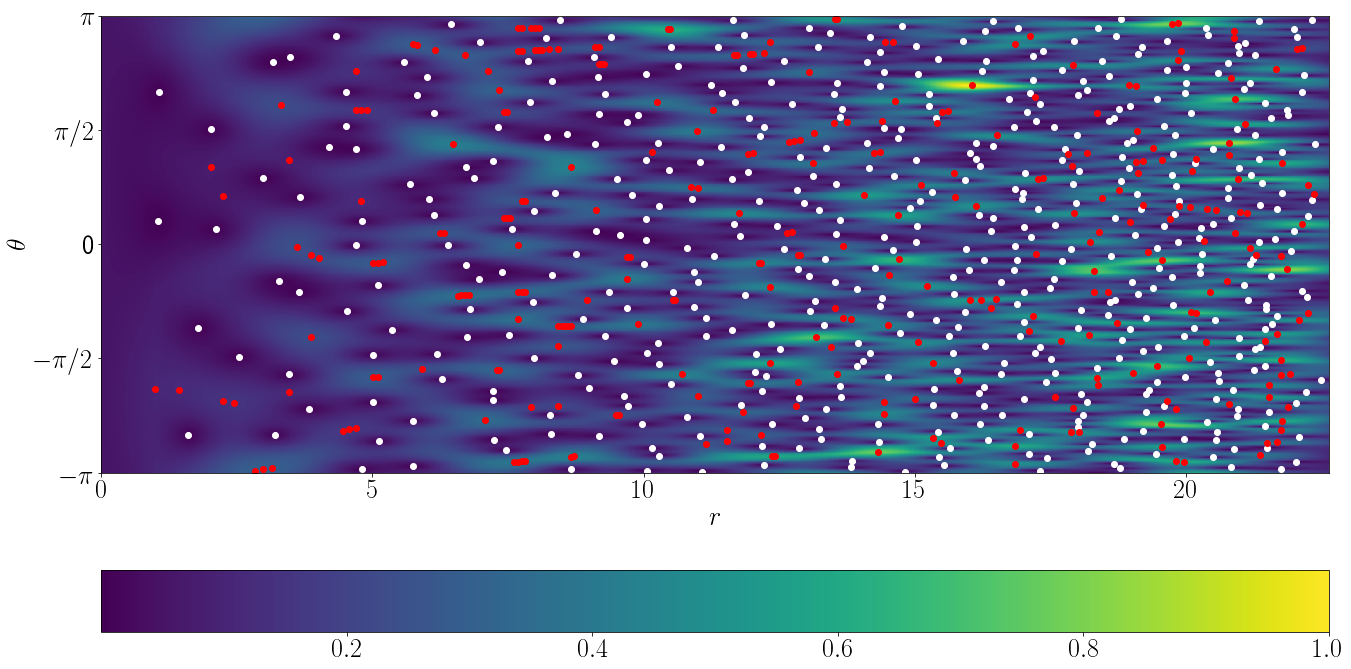

In [2]:
xp = planar.PlanarExperiment(llambda=1, N=2**9)
xp.sampleWhiteNoise()
xp.transform()
xp.findZeros(th = .2)
xp.findMaxima(patchSize=3)
xp.plotResults()
print("There are", len(xp.zerosPolar), "zeros.")
print("There are", len(xp.maximaPolar), "zeros.")

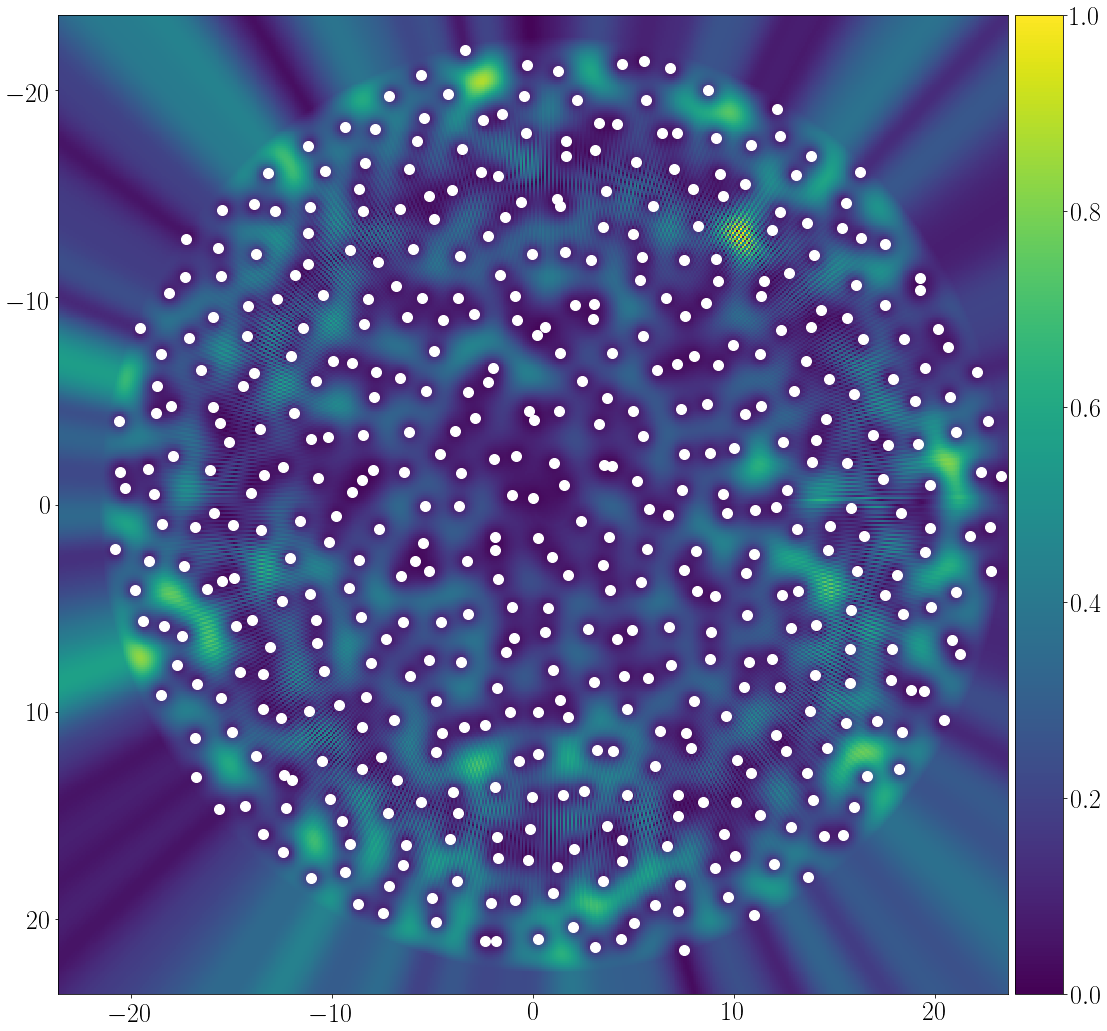

In [4]:
xp.plotTransformedResults(boolShow=True, boolDemo=False)

## More about Charlier polynomials

In [10]:
from charlier import CharlierPolynomials, mu

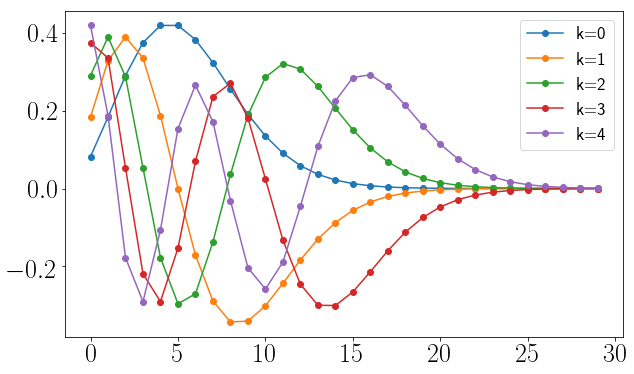

In [11]:
# Plot them
values = np.arange(0,30)
llambda = 5.
mu(llambda, values)
index = 0
for c in CharlierPolynomials(llambda=llambda, n=6, values=values):
    plt.plot(values, c*np.sqrt(mu(llambda, values)),'o-',label="k="+str(index))
    index += 1
plt.legend()
plt.savefig("charlierFunctions_lambda=5.pdf")
plt.savefig("charlierFunctions_lambda=5.eps")
plt.show()

In [12]:
# Check orthonormality
for c in CharlierPolynomials(llambda=llambda, n=3, values=values):
    p = c
for c in CharlierPolynomials(llambda=llambda, n=8, values=values):
    q = c
    
print("total mass of base measure =", np.sum(mu(llambda,values)))
print("Squared norm of p =", np.sum(p*p*mu(llambda,values)))
print("Squared norm of q =", np.sum(q*q*mu(llambda,values)))
print("Inner product of p and q =", np.sum(p*q*mu(llambda,values)))

total mass of base measure = 0.9999999999999711
Squared norm of p = 0.9999999999964225
Squared norm of q = 0.9999662448155201
Inner product of p and q = 1.0885717167972286e-08


## Show the effect of a simple signal

Figures will be saved in the current folder; file names will contain the id "detection".
The Poisson parameter is lambda=1.


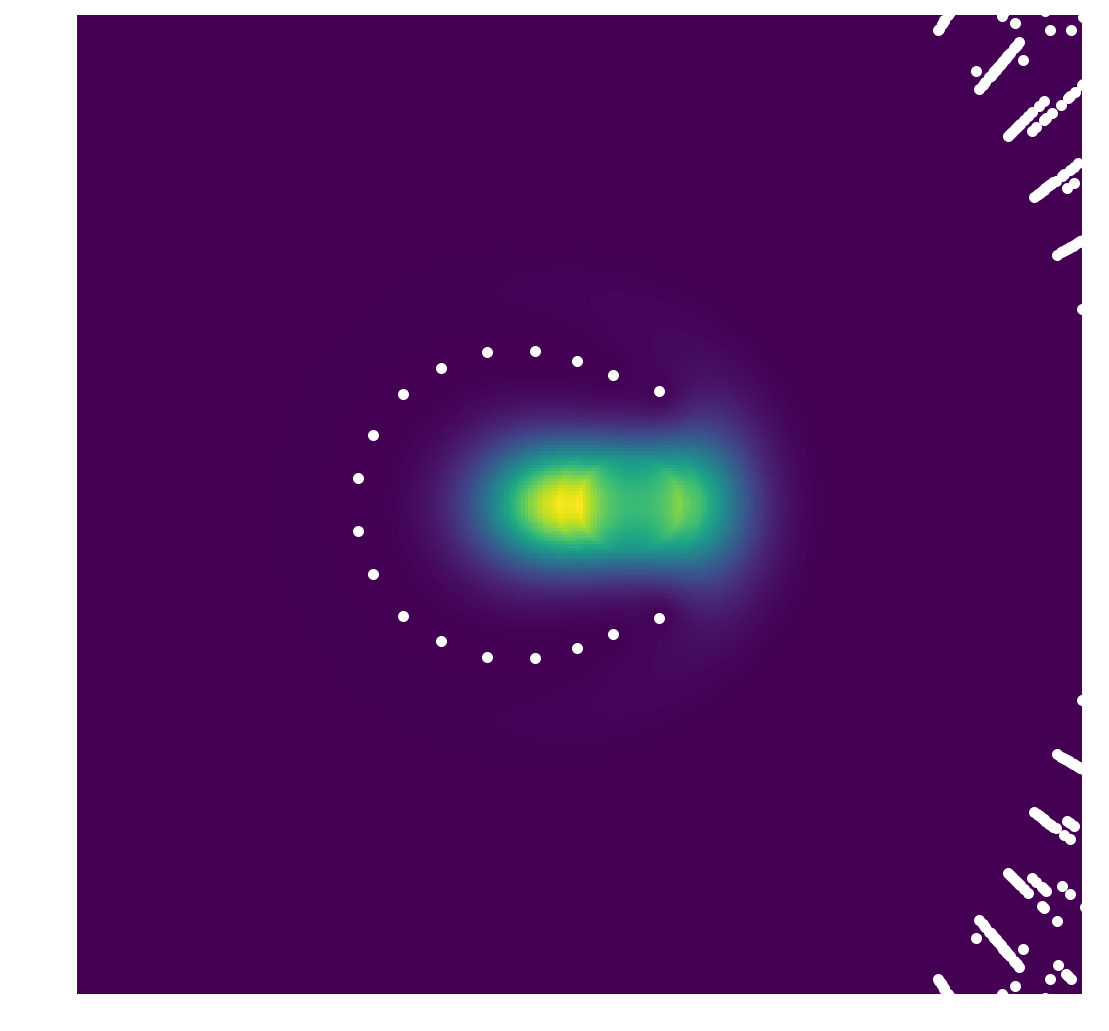

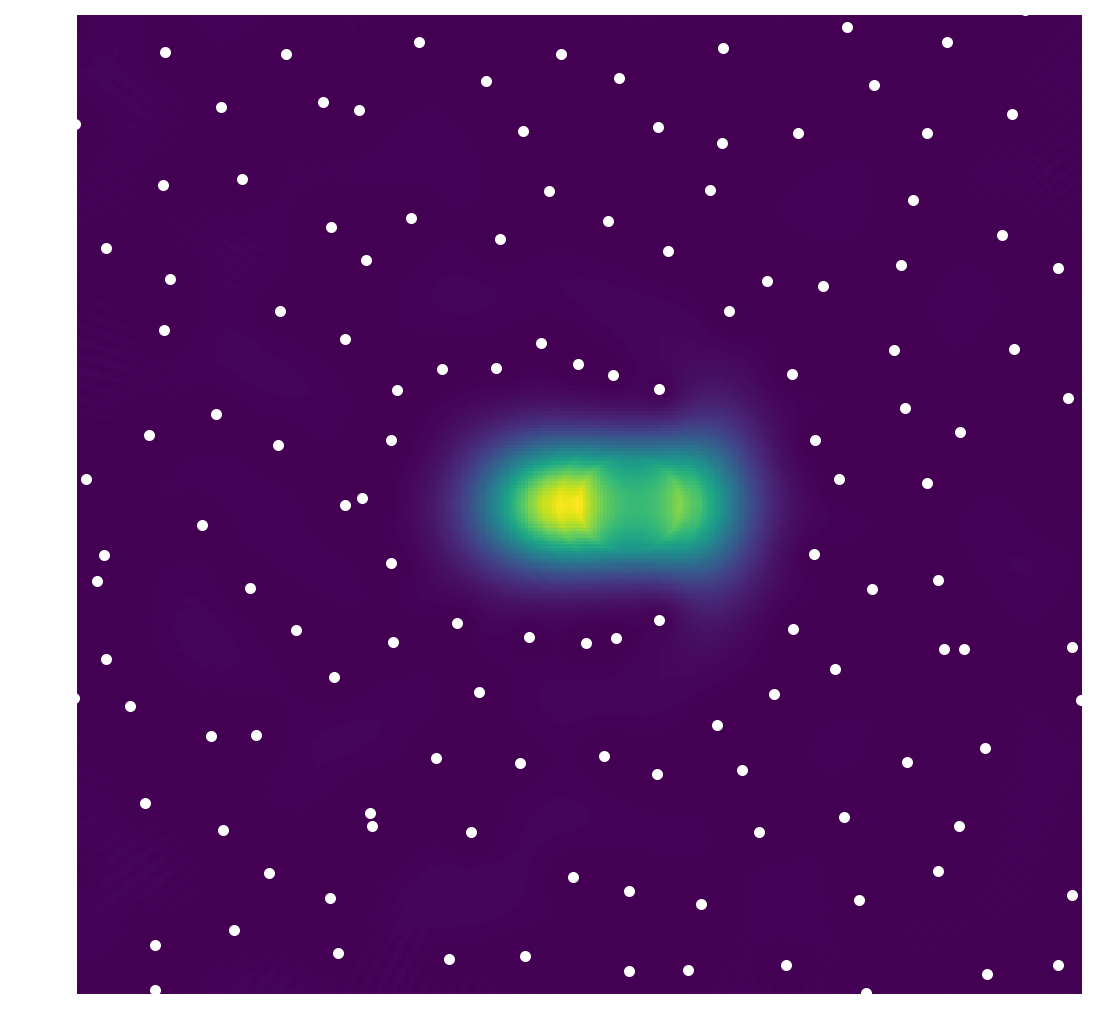

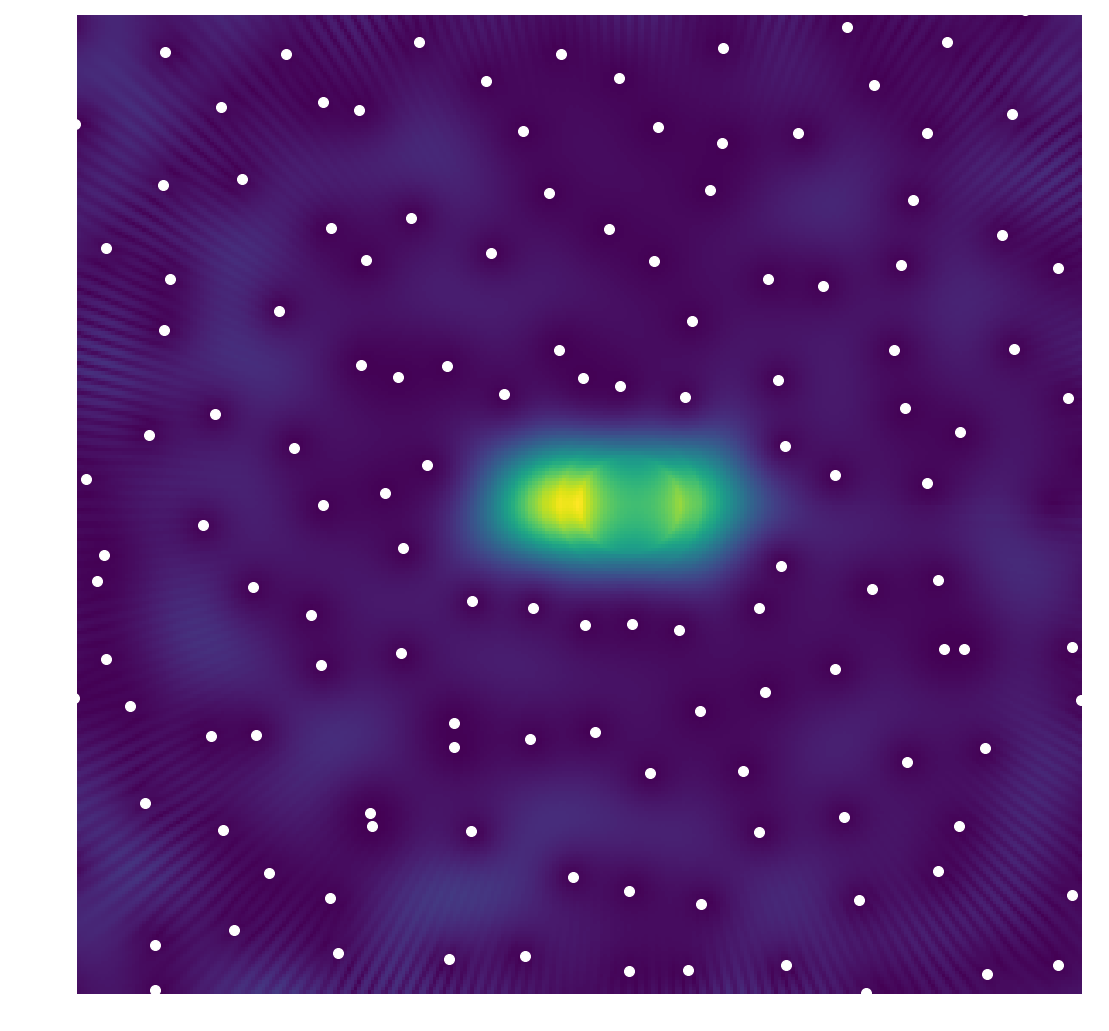

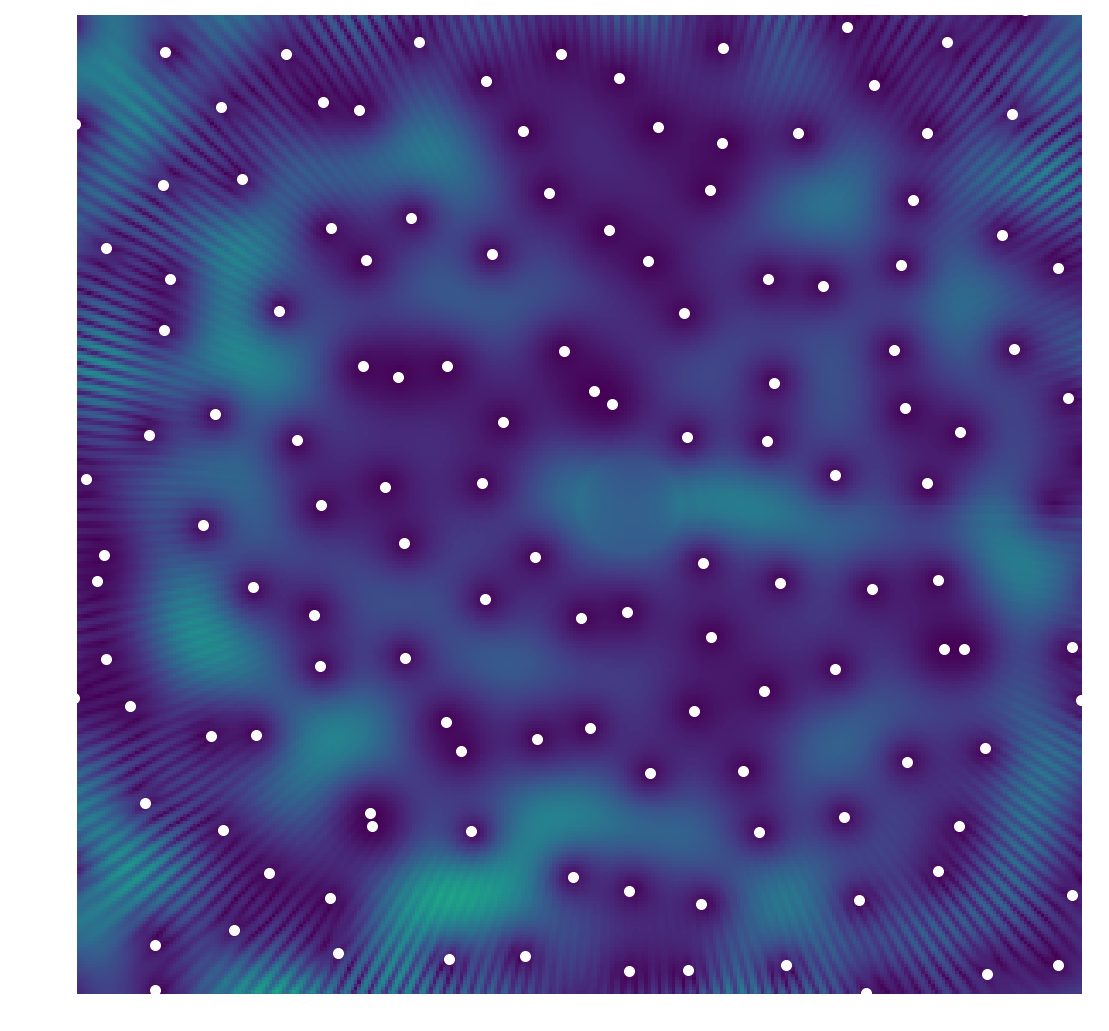

In [25]:
import charlier

npr.seed(1)
xp = planar.PlanarExperiment(llambda=1, N=2**8, expId="detection")

boolPlotSignal = False

for nsr in [0,0.1,1,10]:
    xp.sampleWhiteNoise(1)    
    xp.signal *= nsr # multiply noise by nsr ratio
    snr = 1 # we already use nsr here
    values = np.arange(xp.N)
    if boolPlotSignal:
        plt.plot(np.real(xp.signal))
        plt.plot(np.imag(xp.signal))
        plt.show()

    llambda = 5
    p = np.zeros(values.shape)
    cpt = 1
    for s in CharlierPolynomials(llambda=5, n=20, values=values):
        p += s
        xp.signal += 1/(cpt)*snr*p*np.sqrt(charlier.mu(llambda, values)) # Add one Charlier function

    if boolPlotSignal:    
        plt.plot(np.real(xp.signal), label="Re")
        plt.plot(np.imag(xp.signal), label="Im") 
        #plt.savefig("signal_charlier_"+xp.expId+"_lambdaSignal=5_n=4.pdf")
        #plt.savefig("signal_charlier_"+xp.expId+"_lambdaSignal=5_n=4.eps")
        plt.show()

    xp.transform()
    xp.findZeros(th=.1)
    #xp.findMaxima(patchSize=27)
    xp.plotTransformedResults(boolDemo=1)
    

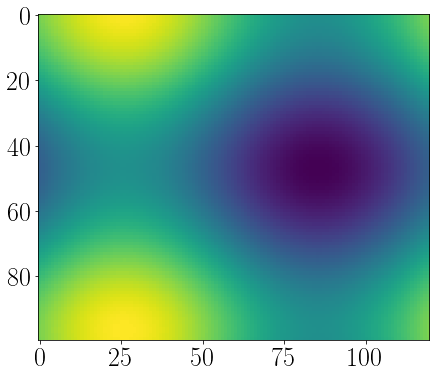

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()